# Historical Data Load  - Fire


The goal of preparing this jupyter is to source information on historical fires in California. 

---
**Project Title:** California wildfires

**Modul:** Data Warehouse and Data Lake Systems 1 (FS 2022)

**Autor:** Maren Forrer

**Browser:** Firefox (Version 99)

**Python:** Python 3.9.5

**Einreichungsdatum:** 24.04.2022

---

In [40]:
# load packages
import psycopg2
import json
import pandas as pd
import numpy as np
import requests
import psycopg2 as pg
import geodata
import logging
from datetime import datetime

## Load Data

In [41]:
# Request API 
response = requests.get('https://opendata.arcgis.com/datasets/d8fdb82b3931403db3ef47744c825fbf_0.geojson')
# response = requests.get('https://services3.arcgis.com/T4QMspbfLg3qTGWY/arcgis/rest/services/Fire_History_Locations_Public/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson')
#response = requests.get('https://services3.arcgis.com/T4QMspbfLg3qTGWY/arcgis/rest/services/Fire_History_Locations_Public/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson')
data = response.json()


In [42]:
# normalize json -> extract only values from features
df = pd.json_normalize(data['features']) 

## Data Exploring

In [4]:
df


,type,properties.OBJECTID,properties.ABCDMisc,properties.ADSPermissionState,properties.CalculatedAcres,properties.ContainmentDateTime,properties.ControlDateTime,properties.DailyAcres,properties.DiscoveryAcres,properties.DispatchCenterID,...,properties.StrategicDecisionPublishDate,properties.CreatedOnDateTime_dt,properties.ModifiedOnDateTime_dt,properties.Source,properties.GlobalID,properties.IsCpxChild,properties.CpxName,properties.CpxID,geometry.type,geometry.coordinates
0,Feature,1,None,CERTIFIED,50.64,2020-08-06T23:13:07Z,2020-08-06T23:13:24Z,50.60,20.00,MTMCC,...,None,2020-08-06T19:50:29Z,2020-08-12T20:46:01Z,IRWIN,{E5436898-ED0D-4CB1-90C0-D61915FE1F29},NaN,None,None,Point,"[-104.45751085699999, 45.78503722500005]"
1,Feature,2,None,DEFAULT,NaN,None,None,NaN,0.10,CALACC,...,None,2020-02-28T20:52:36Z,2020-02-28T20:52:36Z,IRWIN,{0E79B7FD-2882-43CF-8CFA-911BD1C8F77A},NaN,None,None,Point,"[-118.18071215699996, 33.80898483300007]"
2,Feature,3,None,DEFAULT,NaN,2017-10-18T00:30:00Z,2017-10-18T00:35:00Z,50.00,50.00,MTKIC,...,None,2017-10-18T13:46:40Z,2017-11-09T22:08:19Z,IRWIN,{FAC59A92-E6AD-443B-8625-4AAABCF7F533},NaN,None,None,Point,"[-114.83541364699994, 48.07394645100004]"
3,Feature,4,None,DEFAULT,NaN,None,None,NaN,NaN,CAMVIC,...,None,2019-07-01T20:10:12Z,2019-07-01T20:10:12Z,IRWIN,{5DF06F41-9948-49D3-B00A-2D3A1D1049C5},NaN,None,None,Point,"[-117.15390082199997, 33.176393705000066]"
4,Feature,5,None,DEFAULT,NaN,None,None,NaN,NaN,None,...,None,2016-06-20T22:39:02Z,2016-06-20T22:39:02Z,IRWIN,{F378818E-D541-4E0A-9A44-C81886C2B8B4},NaN,None,None,Point,"[-121.10417980899996, 38.83472735300006]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216028,Feature,250809,None,DEFAULT,NaN,None,None,1.00,1.00,IDBDC,...,None,2022-04-22T16:16:36Z,2022-04-22T16:16:38Z,IRWIN,{CEC0BA74-BD53-478D-97C4-4DD7FF02DE47},0.0,None,None,Point,"[-115.96661307199997, 44.20103602700004]"
216029,Feature,250810,None,DEFAULT,NaN,2022-04-22T15:59:59Z,2022-04-22T15:59:59Z,NaN,NaN,NHNEC,...,None,2022-04-22T16:31:07Z,2022-04-22T16:31:07Z,IRWIN,{7A4260D2-0872-4772-8326-0DCCCCD8A0A3},0.0,None,None,Point,"[-70.71588610099997, 44.559668600000066]"
216030,Feature,250811,None,DEFAULT,NaN,2022-04-21T22:30:00Z,None,2.00,NaN,NDNDC,...,None,2022-04-22T16:34:02Z,2022-04-22T16:34:02Z,IRWIN,{FBDE59BE-CDD4-494E-876D-0CC5E7B32E79},0.0,None,None,Point,"[-100.85498412499999, 46.813837653000064]"
216031,Feature,250812,None,DEFAULT,NaN,None,None,NaN,0.01,CARRCC,...,None,2022-04-22T16:41:26Z,2022-04-22T16:41:26Z,IRWIN,{A3196368-A4DF-49A2-B888-3FA2DF334BAA},0.0,None,None,Point,"[-117.24753200699996, 33.91979889700008]"


In [5]:
df.info

<bound method DataFrame.info of            type  properties.OBJECTID properties.ABCDMisc  \
0       Feature                    1                None   
1       Feature                    2                None   
2       Feature                    3                None   
3       Feature                    4                None   
4       Feature                    5                None   
...         ...                  ...                 ...   
216028  Feature               250809                None   
216029  Feature               250810                None   
216030  Feature               250811                None   
216031  Feature               250812                None   
216032  Feature               250813                None   

       properties.ADSPermissionState  properties.CalculatedAcres  \
0                          CERTIFIED                       50.64   
1                            DEFAULT                         NaN   
2                            DEFAULT       

In [6]:
df.describe()

,properties.OBJECTID,properties.CalculatedAcres,properties.DailyAcres,properties.DiscoveryAcres,properties.EstimatedCostToDate,properties.FireStrategyConfinePercent,properties.FireStrategyFullSuppPercent,properties.FireStrategyMonitorPercent,properties.FireStrategyPointZonePercent,properties.InitialLatitude,...,properties.IsMultiJurisdictional,properties.IsReimbursable,properties.IsTrespass,properties.IsUnifiedCommand,properties.PercentContained,properties.PercentPerimeterToBeContained,properties.POOLegalDescSection,properties.TotalIncidentPersonnel,properties.IsDispatchComplete,properties.IsCpxChild
count,216033.000000,4884.000000,1.478390e+05,155442.000000,1.354700e+04,6163.000000,8357.000000,6271.000000,5896.000000,155531.000000,...,159574.000000,162858.000000,162367.000000,7696.000000,18697.000000,7888.000000,2141.000000,10281.000000,216033.0,14555.000000
mean,121421.267408,5941.926408,4.997192e+02,22.106836,1.579107e+06,8.808373,87.071198,16.006538,2.735753,39.775495,...,0.048253,0.101739,0.097366,0.069647,91.887950,90.329488,18.079869,25.633207,0.0,0.033391
std,70760.548004,30575.017443,8.434860e+03,903.143856,1.227530e+07,24.294988,31.442705,35.319740,14.444091,11.999133,...,0.214302,0.302306,0.296456,0.254567,26.142908,28.761998,10.350794,58.974684,0.0,0.179660
min,1.000000,0.003400,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1764.783333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,60351.000000,2.955250,1.000000e-01,0.100000,1.000000e+03,0.000000,100.000000,0.000000,0.000000,34.448970,...,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,9.000000,2.000000,0.0,0.000000
50%,120760.000000,66.167750,3.700000e-01,0.100000,1.200000e+04,0.000000,100.000000,0.000000,0.000000,38.786005,...,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,18.000000,8.000000,0.0,0.000000
75%,181195.000000,1087.400000,5.300000e+00,1.000000,2.000000e+05,0.000000,100.000000,0.000000,0.000000,44.180380,...,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,27.000000,25.000000,0.0,0.000000
max,250813.000000,963405.350400,1.032648e+06,250000.000000,6.374282e+08,100.000000,100.000000,100.000000,100.000000,3549.602000,...,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,36.000000,1404.000000,0.0,1.000000


In [7]:
df.isna().sum().sum()

11586690

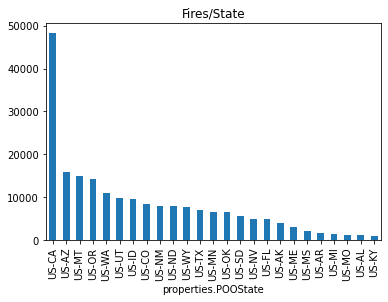

In [104]:
# State with the most fires
df_State = df.groupby(['properties.POOState'])['properties.OBJECTID'].agg('count')
#type(df_State)
df_State_high = df_State.nlargest(n=25, keep='first')
df_State_high.plot.bar(stacked=True, title ="Fires/State");

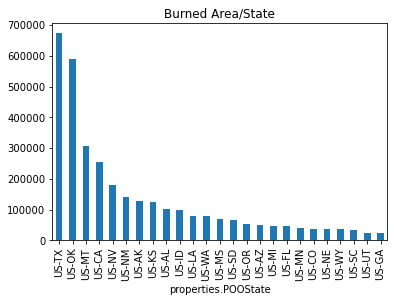

In [105]:
# State with the most burned area
df_State_2 = df.groupby(['properties.POOState'])['properties.DiscoveryAcres'].agg('sum')
#type(df_State_2)
df_State_high_2 = df_State_2.nlargest(n=25, keep='first')
df_State_high_2.plot.bar(stacked=True, title ="Burned Area/State");

<AxesSubplot:title={'center':'Wildfire/State'}, xlabel='properties.POOState'>

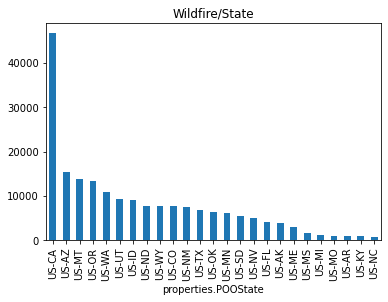

In [108]:
# State with the most Wildfires
df_State_3 = df[(df['properties.IncidentTypeCategory']  == 'WF')]
df_State_3 = df_State_3.groupby(['properties.POOState'])['properties.OBJECTID'].agg('count')
#type(df_State_2)
df_State_high_3 = df_State_3.nlargest(n=25, keep='first')
df_State_high_3.plot.bar(stacked=True, title ="Wildfire/State")

In [46]:
df_CA = df[(df['properties.POOState']  == 'US-CA')]
df_CA.describe()

,properties.OBJECTID,properties.CalculatedAcres,properties.DailyAcres,properties.DiscoveryAcres,properties.EstimatedCostToDate,properties.FireStrategyConfinePercent,properties.FireStrategyFullSuppPercent,properties.FireStrategyMonitorPercent,properties.FireStrategyPointZonePercent,properties.InitialLatitude,...,properties.IsMultiJurisdictional,properties.IsReimbursable,properties.IsTrespass,properties.IsUnifiedCommand,properties.PercentContained,properties.PercentPerimeterToBeContained,properties.POOLegalDescSection,properties.TotalIncidentPersonnel,properties.IsDispatchComplete,properties.IsCpxChild
count,48278.000000,643.000000,1.126700e+04,38221.000000,9.270000e+02,428.000000,583.000000,430.000000,410.000000,39062.000000,...,22865.000000,22869.000000,22899.000000,503.000000,967.000000,643.000000,284.000000,801.000000,48278.0,3771.000000
mean,133517.946518,13128.010646,1.416251e+03,6.705926,1.233180e+07,8.525701,91.660377,9.367442,0.304878,36.296676,...,0.027466,0.144038,0.198742,0.047714,90.087901,92.590980,18.517606,86.561798,0.0,0.049059
std,74409.555360,61214.395825,1.989006e+04,670.306422,4.238502e+07,24.514715,26.396617,27.000645,3.109607,2.753129,...,0.163439,0.351136,0.399062,0.213372,26.725650,24.719089,10.470371,140.072040,0.0,0.216019
min,2.000000,0.010000,1.000000e-02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
25%,68267.000000,0.370000,1.000000e-01,0.100000,2.000000e+05,0.000000,100.000000,0.000000,0.000000,33.992644,...,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,9.000000,10.000000,0.0,0.000000
50%,136605.000000,26.540000,1.000000e-01,0.100000,1.163035e+06,0.000000,100.000000,0.000000,0.000000,34.689255,...,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,19.000000,43.000000,0.0,0.000000
75%,203041.750000,1137.878150,1.000000e+00,0.100000,6.277852e+06,0.000000,100.000000,0.000000,0.000000,38.727660,...,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,27.000000,96.000000,0.0,0.000000
max,250812.000000,963405.350400,1.032648e+06,115997.000000,6.374282e+08,100.000000,100.000000,100.000000,50.000000,42.524880,...,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,36.000000,1404.000000,0.0,1.000000


<AxesSubplot:>

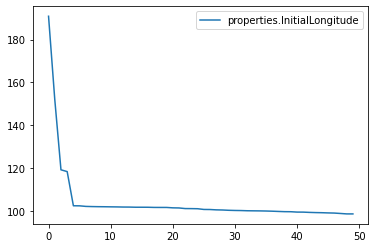

In [98]:
# Outlier regarding Location
# Latitude check
df_CA_5 = df[['properties.OBJECTID','properties.InitialLongitude']]
df_CA_6 = df_CA_5.nlargest(50,'properties.InitialLongitude' )
#df_CA_6= df_CA_6.reset_index(inplace = True)
df_CA_6= df_CA_6.reset_index()
df_CA_6 = df_CA_6[['properties.InitialLongitude']]
df_CA_6.plot.line()

<AxesSubplot:>

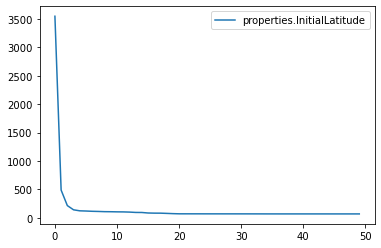

In [100]:
# Outlier regarding Location
# Latitude check
df_CA_5 = df[['properties.OBJECTID','properties.InitialLatitude']]
df_CA_6 = df_CA_5.nlargest(50,'properties.InitialLatitude' )
#df_CA_6= df_CA_6.reset_index(inplace = True)
df_CA_6= df_CA_6.reset_index()
df_CA_6 = df_CA_6[['properties.InitialLatitude']]
df_CA_6.plot.line()

## Data Transforming

In [30]:
# Data reducing 
# 1) reduce the columns -> only the relevant once will be used

df_2 = df[["properties.OBJECTID",
"properties.ContainmentDateTime",
"properties.ControlDateTime",
"properties.DailyAcres",
"properties.DiscoveryAcres",
"properties.FireCause",
"properties.FireCauseGeneral",
"properties.FireCauseSpecific",
"properties.FireDiscoveryDateTime",
"properties.FireMgmtComplexity",
"properties.FireOutDateTime",
"properties.IncidentName",
"properties.IncidentTypeCategory",
"properties.IncidentTypeKind",
"properties.InitialLatitude",
"properties.InitialLongitude",
"properties.InitialResponseAcres",
"properties.POOCity",
"properties.POOCounty",
"properties.POOLandownerKind",
"properties.POOState"]]
    
    
# rename the column names - no real changes, only simplified names    
df_2.rename(columns={'properties.OBJECTID':'OBJECTID ',
'properties.ContainmentDateTime':'ContainmentDateTime',
'properties.ControlDateTime':'ControlDateTime',
'properties.DailyAcres':'DailyAcres',
'properties.DiscoveryAcres':'DiscoveryAcres',
'properties.FireCause':'FireCause',
'properties.FireCauseGeneral':'FireCauseGeneral',
'properties.FireCauseSpecific':'FireCauseSpecific',
'properties.FireDiscoveryDateTime':'FireDiscoveryDateTime',
'properties.FireMgmtComplexity':'FireMgmtComplexity',
'properties.FireOutDateTime':'FireOutDateTime',
'properties.IncidentName':'IncidentName',
'properties.IncidentTypeCategory':'IncidentTypeCategory',
'properties.IncidentTypeKind':'IncidentTypeKind',
'properties.InitialLatitude':'InitialLatitude',
'properties.InitialLongitude':'InitialLongitude',
'properties.InitialResponseAcres':'InitialResponseAcres',
'properties.POOCity':'POOCity',
'properties.POOCounty':'POOCounty',
'properties.POOLandownerKind':'POOLandownerKind',
'properties.POOState':'POOState' }, inplace=True)

# 2) Since the focus of this project is on Wildfire in California which are triggered by natural causes, the following selection is choosen. 


df_3=df_2.copy()
df_4 = df_3[(df_3['POOState']  == 'US-CA') & (df_3['FireCause'] == 'Natural') &(df_3['IncidentTypeCategory'] == 'WF')] 
#df_4.reset_index(inplace=True)
df_4

# 3) Exclusion of lightning strike -> Natural wildfire also contain lightning strike, which are now expluded. 

df_4['FireCauseGeneral'].unique()
filter_FireCause =[ None , 'Other Natural Cause']

df_5 = df_4[df_4.FireCauseGeneral.isin(filter_FireCause)]


df_5.head(5)


C:\Users\maren\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,OBJECTID,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,FireCause,FireCauseGeneral,FireCauseSpecific,FireDiscoveryDateTime,FireMgmtComplexity,...,IncidentName,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,POOCity,POOCounty,POOLandownerKind,POOState
127,139,2016-05-05T02:19:59Z,2016-05-05T03:20:00Z,0.1,0.1,Natural,None,None,2016-05-05T01:59:13Z,None,...,Monroe,WF,FI,38.767220,-119.8167,0.1,None,Alpine,None,US-CA
265,287,2015-07-05T21:59:59Z,2015-07-10T18:59:59Z,0.2,0.1,Natural,None,None,2015-07-05T13:40:13Z,None,...,SPRING,WF,FI,41.421398,-122.4981,NaN,None,Siskiyou,Federal,US-CA
464,510,2019-08-11T21:03:00Z,2019-08-11T21:04:00Z,0.1,0.1,Natural,None,None,2019-08-10T16:57:28Z,None,...,HAPPY,WF,FI,41.046330,-122.0796,NaN,None,Shasta,Federal,US-CA
474,521,2014-08-15T23:00:00Z,2014-08-18T15:59:59Z,14.0,NaN,Natural,None,None,2014-08-12T17:03:00Z,None,...,ETHEL,WF,FI,NaN,NaN,NaN,None,Siskiyou,Federal,US-CA
543,601,2014-07-22T00:59:59Z,2014-07-22T21:29:00Z,0.1,NaN,Natural,None,None,2014-07-20T20:12:00Z,None,...,CHIPMUNK,WF,FI,NaN,NaN,NaN,None,Tuolumne,Federal,US-CA


In [31]:

# Data cleaning/transformation:
# 1)  Initial Latitude & Longitude ->  there are entries with longetide and lotitude combinations which not lie in California, hence this entries are excluded. 

df_5[["InitialLatitude", "InitialLongitude"]].describe()
test_georaphi = df_5[["InitialLatitude", "InitialLongitude"]]
df_6 = df_5[(df_5['InitialLatitude']  > 20) & (df_5['InitialLongitude']  < -100 )]
df_6

# 2) transformtion of the dates, since in the weather data will be sourced on daily basis, the dates get tranformed to the commen standard. 
df_7 = df_6.copy()
#ContainmentDateTime
df_7["ContainmentDateTime"] = pd.to_datetime(df_7["ContainmentDateTime"])
df_7["ContainmentDateTime"] = df_7["ContainmentDateTime"].dt.date
#ControlDateTime
df_7["ControlDateTime"] = pd.to_datetime(df_7["ControlDateTime"])
df_7["ControlDateTime"] = df_7["ControlDateTime"].dt.date
#FireDiscoveryDateTime
df_7["FireDiscoveryDateTime"] = pd.to_datetime(df_7["FireDiscoveryDateTime"])
df_7["FireDiscoveryDateTime"] = df_7["FireDiscoveryDateTime"].dt.date
#FireOutDateTime
df_7["FireOutDateTime"] = pd.to_datetime(df_7["FireOutDateTime"])
df_7["FireOutDateTime"] = df_7["FireOutDateTime"].dt.date

# 3) only rows with complete date entries will be considered

df_8 = df_7.dropna(subset=['ContainmentDateTime', 'ControlDateTime', 'FireDiscoveryDateTime', 'FireOutDateTime'])
df_8

# 4) reset index

df_8 = df_8.reset_index(drop=True)

# 5) add a colum with the data of upload
from datetime import date
df_8['dateOfUpload'] = date.today() # Y-M-D

df_8.head(5)

df_8


,OBJECTID,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,FireCause,FireCauseGeneral,FireCauseSpecific,FireDiscoveryDateTime,FireMgmtComplexity,...,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,POOCity,POOCounty,POOLandownerKind,POOState,dateOfUpload
0,139,2016-05-05,2016-05-05,0.1,0.1,Natural,None,None,2016-05-05,None,...,WF,FI,38.767220,-119.8167,0.1,None,Alpine,None,US-CA,2022-04-21
1,287,2015-07-05,2015-07-10,0.2,0.1,Natural,None,None,2015-07-05,None,...,WF,FI,41.421398,-122.4981,NaN,None,Siskiyou,Federal,US-CA,2022-04-21
2,510,2019-08-11,2019-08-11,0.1,0.1,Natural,None,None,2019-08-10,None,...,WF,FI,41.046330,-122.0796,NaN,None,Shasta,Federal,US-CA,2022-04-21
3,716,2017-08-07,2017-08-20,0.1,0.1,Natural,None,None,2017-08-07,None,...,WF,FI,41.357780,-120.9694,0.1,None,Modoc,Federal,US-CA,2022-04-21
4,901,2017-08-06,2017-08-07,0.1,0.1,Natural,None,None,2017-08-06,None,...,WF,FI,37.751220,-119.1410,0.1,None,Mono,Federal,US-CA,2022-04-21


In [33]:
#df_8['FireDiscoveryDateTime'] = pd.to_datetime(df_8['FireDiscoveryDateTime'])  

rslt_df = df_8.sort_values(by = 'FireDiscoveryDateTime')
rslt_df

,OBJECTID,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,FireCause,FireCauseGeneral,FireCauseSpecific,FireDiscoveryDateTime,FireMgmtComplexity,...,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,POOCity,POOCounty,POOLandownerKind,POOState,dateOfUpload
79,9575,2014-07-09,2014-07-09,0.10,0.1,Natural,None,None,2014-07-09,None,...,WF,FI,34.26300,-114.168701,NaN,None,San Bernardino,None,US-CA,2022-04-21
1048,138563,2014-08-20,2014-09-27,1080.00,0.1,Natural,None,None,2014-07-17,None,...,WF,FI,37.84550,-119.608200,NaN,None,Mariposa,Federal,US-CA,2022-04-21
305,43121,2015-03-11,2015-03-11,0.10,0.1,Natural,None,None,2015-03-13,None,...,WF,FI,37.78210,-119.843200,NaN,None,Tuolumne,Federal,US-CA,2022-04-21
577,75720,2015-04-24,2015-04-24,0.10,0.1,Natural,None,None,2015-04-24,None,...,WF,FI,37.72510,-119.767900,NaN,None,Mariposa,Federal,US-CA,2022-04-21
229,33157,2015-05-08,2015-05-08,1.32,0.1,Natural,None,None,2015-05-07,None,...,WF,FI,41.56790,-121.342000,1.32,None,Modoc,Federal,US-CA,2022-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,224088,2021-08-31,2021-09-02,0.10,0.1,Natural,Other Natural Cause,None,2021-08-30,None,...,WF,FI,34.20117,-116.791300,NaN,None,San Bernardino,Federal,US-CA,2022-04-21
1462,225745,2021-10-14,2021-12-31,1.25,2.0,Natural,None,None,2021-09-10,None,...,WF,FI,36.67090,-118.805500,NaN,None,Tulare,Federal,US-CA,2022-04-21
1460,225700,2021-12-31,2021-12-31,80102.75,2.0,Natural,None,None,2021-09-10,Type 2 Incident,...,WF,FI,36.56688,-118.811500,2.00,None,Tulare,Federal,US-CA,2022-04-21
1461,225740,2021-12-31,2021-12-31,8203.00,0.5,Natural,None,None,2021-09-10,Type 2 Incident,...,WF,FI,36.50725,-118.767500,NaN,Three Rivers,Tulare,Federal,US-CA,2022-04-21


In [35]:
# only needed time frame -> Fire Discovery Date Time -> df_7["FireDiscoveryDateTime"]
import datetime
from datetime import date
from datetime import datetime, timedelta
# Historical: Initial upload with all data up to the date: 
LastUpDateDate = date.today()  - timedelta(days=31) 
# hence the last date which should be included is the 22.03.2022 for the historical load - beacuse at the 22.04 the DAG will take all values t-30

df_historical = df_8[(df_8['FireDiscoveryDateTime']  <= LastUpDateDate )]

#Lambda: last 30 days 

df_lambda = df_8[(df_8['FireDiscoveryDateTime']  > LastUpDateDate )]
   
df_historical

,OBJECTID,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,FireCause,FireCauseGeneral,FireCauseSpecific,FireDiscoveryDateTime,FireMgmtComplexity,...,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,POOCity,POOCounty,POOLandownerKind,POOState,dateOfUpload
0,139,2016-05-05,2016-05-05,0.10,0.1,Natural,None,None,2016-05-05,None,...,WF,FI,38.767220,-119.8167,0.1,None,Alpine,None,US-CA,2022-04-21
1,287,2015-07-05,2015-07-10,0.20,0.1,Natural,None,None,2015-07-05,None,...,WF,FI,41.421398,-122.4981,NaN,None,Siskiyou,Federal,US-CA,2022-04-21
2,510,2019-08-11,2019-08-11,0.10,0.1,Natural,None,None,2019-08-10,None,...,WF,FI,41.046330,-122.0796,NaN,None,Shasta,Federal,US-CA,2022-04-21
3,716,2017-08-07,2017-08-20,0.10,0.1,Natural,None,None,2017-08-07,None,...,WF,FI,41.357780,-120.9694,0.1,None,Modoc,Federal,US-CA,2022-04-21
4,901,2017-08-06,2017-08-07,0.10,0.1,Natural,None,None,2017-08-06,None,...,WF,FI,37.751220,-119.1410,0.1,None,Mono,Federal,US-CA,2022-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,224088,2021-08-31,2021-09-02,0.10,0.1,Natural,Other Natural Cause,None,2021-08-30,None,...,WF,FI,34.201170,-116.7913,NaN,None,San Bernardino,Federal,US-CA,2022-04-21
1460,225700,2021-12-31,2021-12-31,80102.75,2.0,Natural,None,None,2021-09-10,Type 2 Incident,...,WF,FI,36.566880,-118.8115,2.0,None,Tulare,Federal,US-CA,2022-04-21
1461,225740,2021-12-31,2021-12-31,8203.00,0.5,Natural,None,None,2021-09-10,Type 2 Incident,...,WF,FI,36.507250,-118.7675,NaN,Three Rivers,Tulare,Federal,US-CA,2022-04-21
1462,225745,2021-10-14,2021-12-31,1.25,2.0,Natural,None,None,2021-09-10,None,...,WF,FI,36.670900,-118.8055,NaN,None,Tulare,Federal,US-CA,2022-04-21


### Creat Postgresql tables and upload the historical data

In [38]:
# Read credentials from json
credentialsFile = open('credentialsForrer.json')
credentials = json.load(credentialsFile)
credentialsFile.close()
credentialsDic = credentials['credentialsForrer'][0]



In [34]:
# Connect with the RDS - via credentials from json
connectionRequest = "host=" + credentialsDic['rds_host'] + "  dbname=" + credentialsDic['db_name'] + " user=" + credentialsDic['name'] + " password=" + credentialsDic['password']
try: 
    conn = psycopg2.connect(connectionRequest)
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)

In [33]:
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)
    
# Auto commit is very important
conn.set_session(autocommit=True)

In [50]:
# Only needed if the table is not empty
#cur.execute("DROP TABLE Firedata_History")

In [35]:
# SQL Query to count how many rows the table has. - Check if table is empthy before the one time historical upload.  
cur.execute("select count(*) from Firedata_History;")
print(cur.fetchall())

[(1464,)]


In [52]:
# create table in RDS PostgreSQL if not exists
cur.execute("CREATE TABLE IF NOT EXISTS Firedata_History ( OBJECTID INTEGER, ContainmentDateTime DATE, ControlDateTime DATE, DailyAcres FLOAT, DiscoveryAcres Float, FireCause varchar(30), FireCauseGeneral VARCHAR (255), FireCauseSpecific VARCHAR (255), FireDiscoveryDateTime DATE, FireMgmtComplexity VARCHAR (255), FireOutDateTime DATE, IncidentName VARCHAR (255), IncidentTypeCategory VARCHAR (2), IncidentTypeKind VARCHAR (5), InitialLatitude Float, InitialLongitude Float, InitialResponseAcres Float, POOCity VARCHAR (255), POOCounty VARCHAR (255), POOLandownerKind VARCHAR (255), POOState VARCHAR (10), dateOfUpload DATE)")


In [53]:
#load data into the PostgreSQL table
data = df_historical

# def. columns
cols = ",".join([str(i) for i in data.columns.tolist()])

#  each values gets loaded into PostgreSQL
for i,row in data.iterrows():
    sql = "INSERT INTO Firedata_History  (" +cols + ") VALUES (" + "%s,"*(len(row)-1) + "%s)"
    cur.execute(sql, tuple(row))

    # save the changes
    conn.commit()

In [54]:
# SQL Query to count how many rows the table has. - Check if table is empthy before the one time historical upload.  
cur.execute("select count(*) from Firedata_History;")
print(cur.fetchall())

[(1464,)]


In [55]:
# count how many rows the df has
len(df_historical)

1464

In [36]:
# close the connection 
cur.close()
conn.close()